In [1]:
from ismn.interface import ISMN_Interface
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
!unzip '~/Indonesia_sm/ISMN/_noEurope_noNorthAmerica_20141010_20201001.zip'

In [5]:
path_to_ismn_data = '~/Indonesia_sm/ISMN/'

~/.local/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
~/.local/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
~/.local/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


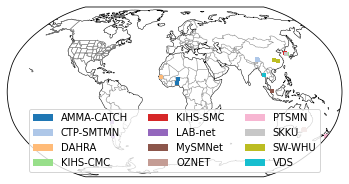

In [6]:
ISMN_reader = ISMN_Interface(path_to_ismn_data)

#plot available station on a map
fig, ax = ISMN_reader.plot_station_locations()
plt.show()

In [38]:
for network in ISMN_reader.list_networks():
    for station in ISMN_reader.list_stations(network=network):
        print(network, station)
        variables = ['soil moisture']
        st_obj = ISMN_reader.get_station(station)
        print(st_obj.get_variables())
        print(st_obj.get_depths(variables[0]))
        depths_from, depths_to = st_obj.get_depths(variables[0])
        sensors = st_obj.get_sensors(variables[0], depths_from[0], depths_to[0])
        print(sensors)
        time_series = st_obj.read_variable(variables[0],depth_from=depths_from[0],depth_to=depths_to[0],sensor=sensors[0])
        break
    break

AMMA-CATCH Banizoumbou
['soil moisture']
(array([0.05, 0.05]), array([0.05, 0.05]))
['CS616-1' 'CS616-2']


In [39]:
time_series.data

,soil moisture,soil moisture_flag,soil moisture_orig_flag
date_time,,,
2014-10-10 00:00:00+00:00,0.0086,G,M
2014-10-10 01:00:00+00:00,0.0086,G,M
2014-10-10 02:00:00+00:00,0.0086,G,M
2014-10-10 03:00:00+00:00,0.0086,G,M
2014-10-10 04:00:00+00:00,0.0083,G,M
...,...,...,...
2018-12-31 19:00:00+00:00,0.0083,G,M
2018-12-31 20:00:00+00:00,0.0083,G,M
2018-12-31 21:00:00+00:00,0.0083,G,M
